Загружаем все нужные либы

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random

In [26]:
data = pd.read_csv("train.csv")
data

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7255,8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,0,1,1003
7256,8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,0,1,764
7257,8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,0,1,694
7258,8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,0,1,712


Сверху мы считали файл, внизу небольшая визуалицая чтобы понимать, с чем мы вообще будем рабоать

In [27]:
data.head()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7260 entries, 0 to 7259
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                7260 non-null   int64  
 1   Date              7260 non-null   object 
 2   Hour              7260 non-null   int64  
 3   Temperature       7260 non-null   float64
 4   Humidity          7260 non-null   int64  
 5   Wind_Speed        7260 non-null   float64
 6   Visibility        7260 non-null   int64  
 7   Dew_Point         7260 non-null   float64
 8   Solar_Radiation   7260 non-null   float64
 9   Rainfall          7260 non-null   float64
 10  Snowfall          7260 non-null   float64
 11  Season            7260 non-null   object 
 12  IsHoliday         7260 non-null   int64  
 13  IsFunctioningDay  7260 non-null   int64  
 14  Bikes_Rented      7260 non-null   int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 850.9+ KB


In [29]:
data.describe()

,Id,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,IsHoliday,IsFunctioningDay,Bikes_Rented
count,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4362.661295,11.497658,12.838871,58.258127,1.720441,1439.033333,4.048223,0.568001,0.150510,0.074050,0.050275,0.967355,703.427548
std,2531.561970,6.933540,12.043146,20.358714,1.039105,606.862754,13.141417,0.866972,1.169305,0.426481,0.218528,0.177717,645.327438
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2155.750000,5.000000,3.200000,42.000000,0.900000,941.750000,-4.725000,0.000000,0.000000,0.000000,0.000000,1.000000,190.000000
50%,4358.500000,11.000000,13.700000,57.000000,1.500000,1699.000000,5.100000,0.010000,0.000000,0.000000,0.000000,1.000000,499.000000
75%,6559.250000,18.000000,22.600000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,0.000000,1.000000,1066.000000
max,8759.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,1.000000,1.000000,3556.000000


Чистим дубликаты + преобразуем данные

In [30]:
data.dropna(inplace=True)

Вектора и матрицц

In [31]:
temperature = np.array(data['Temperature'])
humidity = np.array(data['Humidity'])
bikes_rented = np.array(data['Bikes_Rented'])

Зима + утренние часы

In [40]:
winter_data = data[data['Season'] == "Winter"]
morning_data = data[data['Hour'] < 12]

In [41]:
winter_data.head()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78


In [38]:
morning_data.head()

,Id,Date,Hour,Temperature,Humidity,Wind_Speed,Visibility,Dew_Point,Solar_Radiation,Rainfall,Snowfall,Season,IsHoliday,IsFunctioningDay,Bikes_Rented
0,0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,254
1,1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,204
2,2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,173
3,3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,107
4,4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,78


Теперь перейдем к векторам

In [53]:
vector1 = np.array([10, 12, 33])
vector2 = np.array([49, 5, 56])

In [54]:
vector1

array([10, 12, 33])

In [55]:
vector2

array([49,  5, 56])

Операции над векторами, будет сложение, вычитаение и умножение на какое то число

In [56]:
vector1 + vector2

array([59, 17, 89])

In [58]:
vector2 - vector1

array([39, -7, 23])

In [59]:
(vector1 - vector2) * -5

array([195, -35, 115])

скаля.производение

In [60]:
dot_product = np.dot(temperature, bikes_rented)
dot_product

96184387.39999999

Корреляция Пирсона

In [62]:
def pearson_correlation(x, y):
    return np.corrcoef(x, y)[0, 1]

corr_temp_bikes = pearson_correlation(temperature, bikes_rented)
corr_temp_bikes

0.5427209609111601

Cos сходство

In [63]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.linalg.norm(x) * np.linalg.norm(y))

cos_sim = cosine_similarity(temperature, bikes_rented)
cos_sim

0.7884650564973602

In [ ]:
Нормализация векторов

In [67]:
def normalize_vector(x):
    return x / np.linalg.norm(x)

normalized_temp = normalize_vector(temperature)
normalized_bikes = normalize_vector(bikes_rented)

In [66]:
normalized_bikes

array([0.0031229 , 0.00250816, 0.00212702, ..., 0.00853266, 0.00875396,
       0.00718022])

In [68]:
normalized_temp

array([-0.00346702, -0.00366704, -0.00400041, ...,  0.00173351,
        0.00140014,  0.0012668 ])

фильтрация врем.рядов

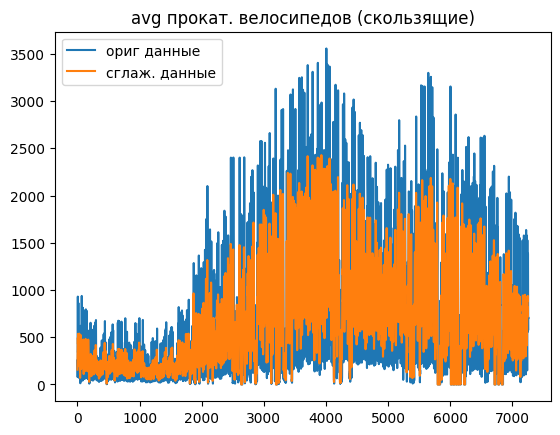

In [85]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

smoothed_bikes = moving_average(bikes_rented, window_size=7)
plt.plot(bikes_rented, label="ориг данные")
plt.plot(smoothed_bikes, label="сглаж. данные")
plt.legend()
plt.title("avg прокат. велосипедов (скользящие)")
plt.show()

Кластеризация методом k-средних

In [89]:
X = np.column_stack((temperature, humidity, bikes_rented))

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

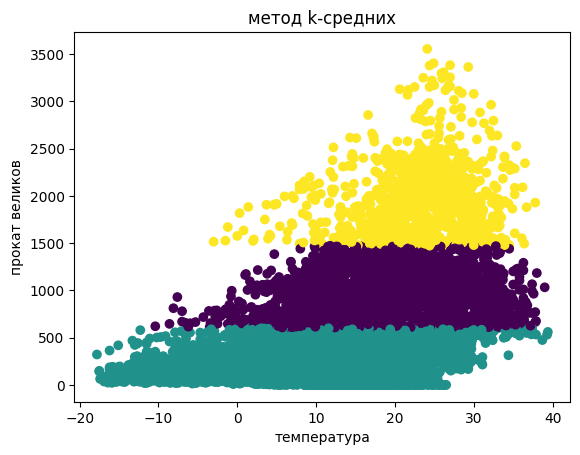

In [91]:
plt.scatter(temperature, bikes_rented, c=labels, cmap='viridis')
plt.xlabel("температура")
plt.ylabel("прокат великов")
plt.title("метод k-средних")
plt.show()

геним случайные данные + анализируем их (по Пирсу)

In [101]:
np.random.seed(69)
random_temperature = np.random.normal(loc=20, scale=5, size=len(temperature))
random_bikes = np.random.normal(loc=500, scale=100, size=len(bikes_rented))

In [102]:
corr_random = pearson_correlation(random_temperature, random_bikes)
corr_random

0.0030000856591012415

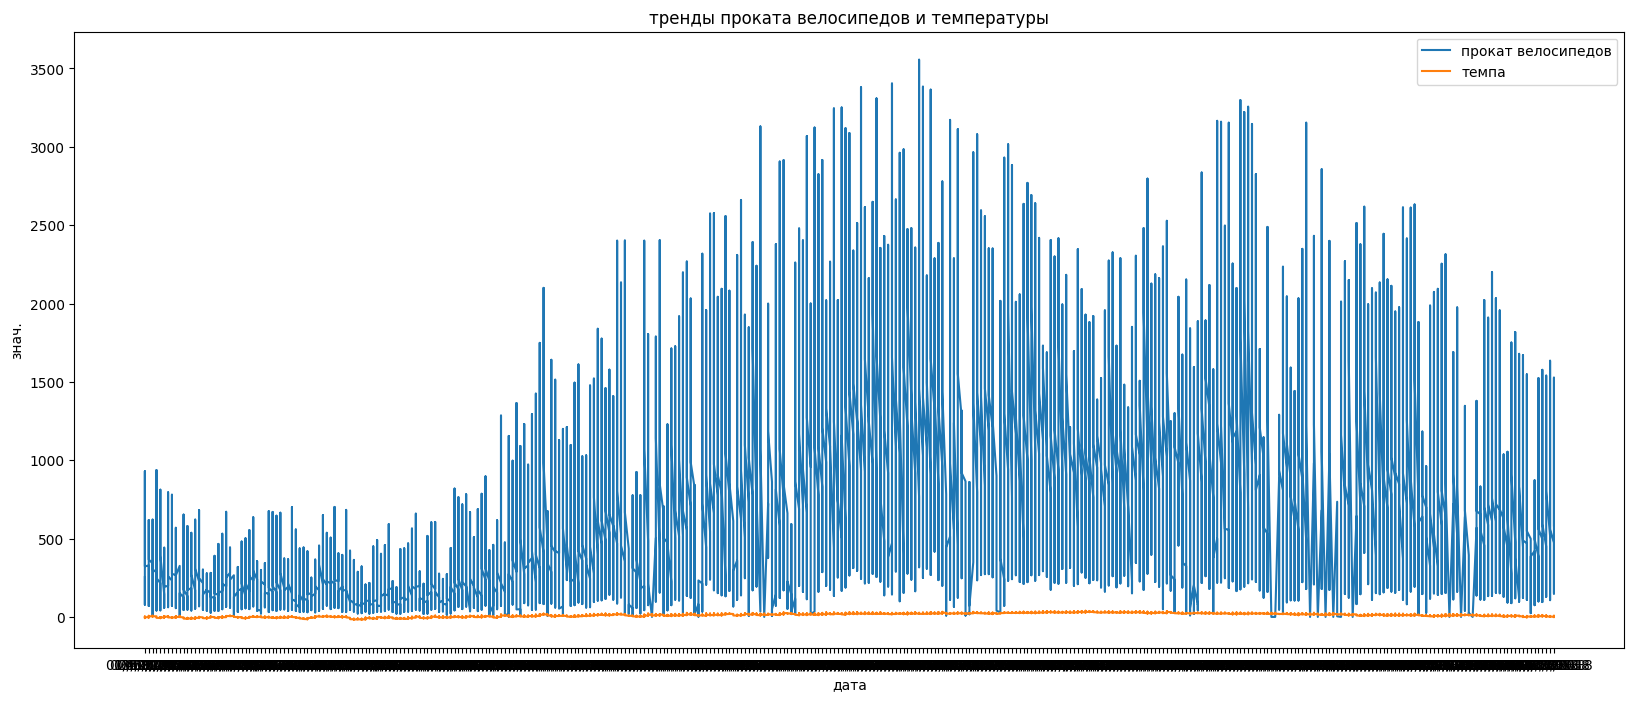

In [112]:
plt.figure(figsize=(20, 8))
plt.plot(data['Date'], bikes_rented, label="прокат велосипедов")
plt.plot(data['Date'], temperature, label="темпа")
plt.xlabel("дата")
plt.ylabel("знач.")
plt.title("тренды проката велосипедов и температуры")
plt.legend()
plt.show()

тепловая карта коррлеции

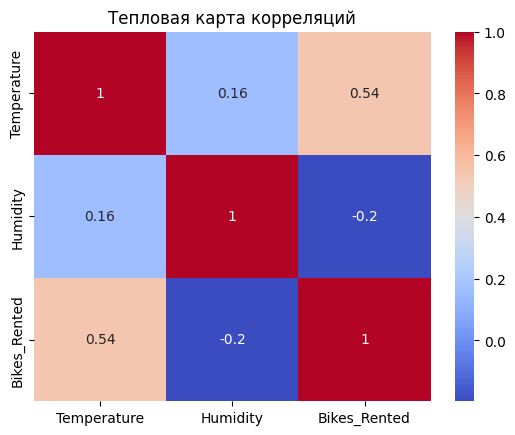

In [109]:
corr_matrix = data[['Temperature', 'Humidity', 'Bikes_Rented']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Тепловая карта корреляций")
plt.show()